In [76]:
import pandas as pd

#docs = pd.read_excel('SMSSpamCollection.xls',header=None,names=['Class', 'SMS']) 
docs = pd.read_csv('movie_review_train.csv')

#classifier in column 1, sms in column 2.
docs.head()


,class,text
0,Pos,a common complaint amongst film critics is ...
1,Pos,whew this film oozes energy the kind of b...
2,Pos,steven spielberg s amistad which is bas...
3,Pos,he has spent his entire life in an awful litt...
4,Pos,being that it is a foreign language film with...


In [78]:
# counting spam and ham instances
# df.column_name.value_counts() - gives no. of unique inputs in the columns
ham_spam=docs["class"].value_counts()
ham_spam

Neg    800
Pos    800
Name: class, dtype: int64

In [79]:
print("Spam % is ",(ham_spam[1]/float(ham_spam[0]+ham_spam[1]))*100)

Spam % is  50.0


In [81]:
# mapping labels to 0 and 1
docs['label'] = docs["class"].map({'Neg':0, 'Pos':1})

In [82]:
docs.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [83]:
X=docs.text
y=docs.label

In [85]:
X_train = docs.text
y_train = docs.label
print(X.shape)
print(y.shape)

(1600,)
(1600,)


In [86]:
test_dataset = pd.read_csv('movie_review_test.csv')

In [87]:
test_dataset.head()

,class,text
0,Pos,films adapted from comic books have had plent...
1,Pos,every now and then a movie comes along from a...
2,Pos,you ve got mail works alot better than it des...
3,Pos,jaws is a rare film that grabs your atte...
4,Pos,moviemaking is a lot like being the general m...


In [88]:
test_dataset["label"] = test_dataset["class"].map({'Pos':1, "Neg": 0})

In [89]:
X_test = test_dataset.text
y_test = test_dataset.label

In [9]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [93]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english', min_df=.03,max_df=.8)

In [94]:
vect.fit(X_train)
# X_train_dtm = vect.transform(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=None, min_df=0.03,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [95]:
# printing the vocabulary
vect.get_feature_names()

['000',
 '10',
 '100',
 '13',
 '15',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '30',
 '80',
 '90',
 'ability',
 'able',
 'absolutely',
 'academy',
 'accent',
 'accept',
 'accident',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'adaptation',
 'add',
 'added',
 'addition',
 'adds',
 'admit',
 'adult',
 'adults',
 'adventure',
 'affair',
 'age',
 'agent',
 'ago',
 'agree',
 'agrees',
 'ahead',
 'air',
 'albeit',
 'alien',
 'aliens',
 'alive',
 'allen',
 'allow',
 'allowed',
 'allows',
 'amazing',
 'america',
 'american',
 'amusing',
 'animated',
 'animation',
 'annoying',
 'answer',
 'anti',
 'apart',
 'apartment',
 'apparent',
 'apparently',
 'appeal',
 'appealing',
 'appear',
 'appearance',
 'appears',
 'appreciate',
 'approach',
 'appropriate',
 'aren',
 'army',
 'arrives',
 'art',
 'artist',
 'aside',
 'ask',
 'asked',
 'asking',
 'asks',
 'aspect',
 'aspects',
 'ass',
 'assistant',
 'atmosphere',
 'a

In [96]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed =vect.transform(X_test)

In [97]:
# note that the type is transformed matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 4)	1
  (0, 59)	2
  (0, 72)	1
  (0, 78)	1
  (0, 81)	1
  (0, 99)	3
  (0, 101)	1
  (0, 192)	1
  (0, 211)	1
  (0, 213)	1
  (0, 220)	1
  (0, 264)	2
  (0, 287)	1
  (0, 316)	1
  (0, 323)	1
  (0, 328)	1
  (0, 340)	1
  (0, 342)	1
  (0, 357)	1
  (0, 386)	1
  (0, 413)	2
  (0, 445)	2
  (0, 464)	1
  (0, 503)	1
  (0, 506)	1
  :	:
  (1599, 1247)	1
  (1599, 1258)	2
  (1599, 1267)	1
  (1599, 1271)	1
  (1599, 1331)	1
  (1599, 1335)	1
  (1599, 1339)	1
  (1599, 1366)	3
  (1599, 1371)	1
  (1599, 1375)	1
  (1599, 1379)	1
  (1599, 1413)	1
  (1599, 1421)	1
  (1599, 1429)	2
  (1599, 1447)	1
  (1599, 1501)	1
  (1599, 1533)	1
  (1599, 1550)	1
  (1599, 1555)	1
  (1599, 1556)	1
  (1599, 1570)	1
  (1599, 1579)	2
  (1599, 1589)	1
  (1599, 1609)	1
  (1599, 1616)	1


In [98]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
# fit
mnb.fit(X_train_transformed,y_train)
# predict class
y_pred_class = mnb.predict(X_test_transformed)
# predict probabilities
y_pred_proba =mnb.predict_proba(X_test_transformed)
# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)


0.8275

In [116]:
# note that alpha=1 is used by default for smoothing
mnb.feature_count_.shape

(2, 1643)

In [119]:
# Neg_token_count = mnb.feature_count_[0, :]
# Pos_token_count = mnb.feature_count_[1, :]
# tokens = pd.DataFrame({'words':X_train_vocabs, 'Pos':Pos_token_count, 'Neg':Neg_token_count}).set_index('words')
# tokens.loc['stupid', ]

In [100]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[172,  28],
       [ 41, 159]])

In [101]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[172  28]
 [ 41 159]]


In [102]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.795


In [103]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.86


In [104]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8502673796791443
0.8502673796791443


In [105]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8502673796791443
PRECISION SCORE : 0.8502673796791443
RECALL SCORE : 0.795
F1 SCORE : 0.821705426356589


In [106]:
y_pred_class

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [107]:
y_pred_proba

array([[4.72220911e-01, 5.27779089e-01],
       [1.46791072e-02, 9.85320893e-01],
       [8.06229525e-03, 9.91937705e-01],
       [3.82892252e-14, 1.00000000e+00],
       [9.99994569e-01, 5.43053306e-06],
       [2.06482974e-19, 1.00000000e+00],
       [1.84756956e-10, 1.00000000e+00],
       [4.41160693e-05, 9.99955884e-01],
       [6.34701076e-04, 9.99365299e-01],
       [2.15099949e-03, 9.97849001e-01],
       [1.67387911e-04, 9.99832612e-01],
       [1.53916508e-03, 9.98460835e-01],
       [9.42580804e-06, 9.99990574e-01],
       [3.94569247e-06, 9.99996054e-01],
       [1.30379599e-02, 9.86962040e-01],
       [4.95955521e-03, 9.95040445e-01],
       [4.87700524e-01, 5.12299476e-01],
       [4.84740721e-11, 1.00000000e+00],
       [1.45854901e-01, 8.54145099e-01],
       [9.79724905e-01, 2.02750951e-02],
       [1.52084321e-01, 8.47915679e-01],
       [1.09017591e-03, 9.98909824e-01],
       [9.99997220e-01, 2.78000287e-06],
       [8.18449930e-09, 9.99999992e-01],
       [2.546754

In [108]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [109]:
# area under the curve
print (roc_auc)

0.887675


In [110]:
print(true_positive_rate)

[0.    0.07  0.255 0.255 0.39  0.39  0.48  0.48  0.485 0.485 0.51  0.51
 0.56  0.56  0.565 0.565 0.575 0.575 0.595 0.595 0.6   0.6   0.61  0.61
 0.63  0.63  0.635 0.635 0.66  0.66  0.68  0.68  0.7   0.7   0.705 0.705
 0.735 0.735 0.75  0.75  0.76  0.76  0.77  0.77  0.775 0.775 0.78  0.78
 0.795 0.795 0.8   0.8   0.805 0.805 0.81  0.81  0.82  0.82  0.825 0.825
 0.83  0.83  0.835 0.835 0.845 0.845 0.85  0.85  0.855 0.855 0.86  0.86
 0.865 0.865 0.875 0.875 0.88  0.88  0.895 0.895 0.9   0.9   0.91  0.91
 0.915 0.915 0.92  0.92  0.925 0.925 0.93  0.93  0.935 0.935 0.94  0.94
 0.945 0.945 0.965 0.965 0.975 0.975 0.98  0.98  0.985 0.985 0.99  0.99
 0.995 0.995 1.    1.   ]


In [111]:
print(false_positive_rate)

[0.    0.    0.    0.005 0.005 0.01  0.01  0.015 0.015 0.02  0.02  0.025
 0.025 0.03  0.03  0.035 0.035 0.045 0.045 0.05  0.05  0.055 0.055 0.065
 0.065 0.07  0.07  0.075 0.075 0.08  0.08  0.085 0.085 0.09  0.09  0.095
 0.095 0.1   0.1   0.105 0.105 0.12  0.12  0.125 0.125 0.135 0.135 0.14
 0.14  0.145 0.145 0.155 0.155 0.16  0.16  0.185 0.185 0.205 0.205 0.215
 0.215 0.22  0.22  0.235 0.235 0.275 0.275 0.285 0.285 0.29  0.29  0.3
 0.3   0.32  0.32  0.33  0.33  0.365 0.365 0.385 0.385 0.41  0.41  0.465
 0.465 0.47  0.47  0.475 0.475 0.48  0.48  0.495 0.495 0.515 0.515 0.53
 0.53  0.68  0.68  0.695 0.695 0.705 0.705 0.765 0.765 0.77  0.77  0.87
 0.87  0.88  0.88  1.   ]


In [112]:
print(thresholds)

[2.00000000e+00 1.00000000e+00 9.99999818e-01 9.99999796e-01
 9.99981374e-01 9.99972151e-01 9.99657054e-01 9.99630552e-01
 9.99622104e-01 9.99618553e-01 9.99259468e-01 9.99245098e-01
 9.98047203e-01 9.97938722e-01 9.97849001e-01 9.97771110e-01
 9.97453245e-01 9.96456355e-01 9.94597572e-01 9.94309750e-01
 9.93096357e-01 9.92608692e-01 9.91937705e-01 9.90489573e-01
 9.84252019e-01 9.83391658e-01 9.82677529e-01 9.81009936e-01
 9.70887545e-01 9.66142587e-01 9.35768846e-01 9.25819202e-01
 8.97129426e-01 8.87272972e-01 8.79205303e-01 8.77297290e-01
 8.44371129e-01 8.36769923e-01 8.08988045e-01 8.07209961e-01
 7.67199978e-01 6.83048958e-01 6.58056810e-01 6.56483931e-01
 6.44948794e-01 6.36438753e-01 5.52927996e-01 5.30840069e-01
 5.12299476e-01 4.61536696e-01 4.55164774e-01 4.21405908e-01
 3.90510300e-01 3.25889800e-01 3.21355395e-01 2.88909395e-01
 2.46142705e-01 1.89774752e-01 1.79115962e-01 1.57001495e-01
 1.38803169e-01 1.30026282e-01 1.04905096e-01 7.87428646e-02
 7.30198484e-02 4.672084

In [113]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000,0.000
1,1.000000e+00,0.070,0.000
2,9.999998e-01,0.255,0.000
3,9.999998e-01,0.255,0.005
4,9.999814e-01,0.390,0.005
...,...,...,...
107,4.415070e-10,0.990,0.870
108,4.012904e-10,0.995,0.870
109,1.953619e-10,0.995,0.880
110,1.115619e-10,1.000,0.880


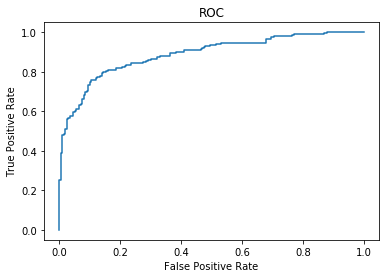

In [114]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)